In [1]:
import cv2
import json
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
json_filename = 'annotations/2020_08_13__8664_30411.json' #json annotations
read_file = open(json_filename, "r") 
data = json.load(read_file)

In [10]:
#data[0]
polys = []
#for index in range(data.__len__()):
geom = np.array(data['annotation'], dtype=object) #coordinates of the polygons

In [12]:
len(data['features']['class']), len(geom)

(536, 536)

In [14]:
img = cv2.imread('HandE/2020_08_13__8664_30411.tif') #H&E image 
shape = img.shape[0:2]
shape

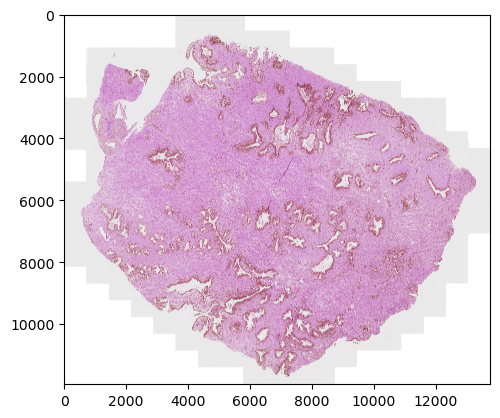

In [135]:
plt.imshow(img)

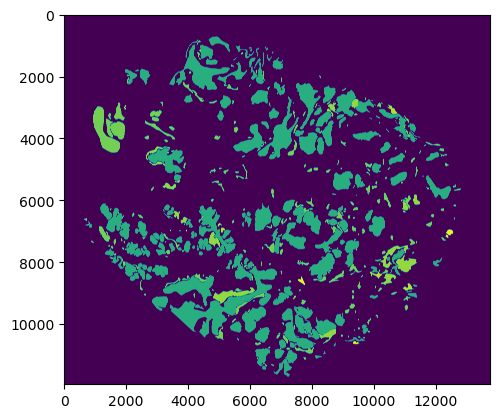

In [22]:
mask_1 = np.zeros((shape[1], shape[0]))

for i, j in zip(range(len(geom)), data['features']['class']):
    cv2.fillPoly(mask_1, pts=[np.array(geom[i], dtype=np.int32)], color=j) #create the mask
    
nimg = cv2.transpose(mask_1)
plt.imshow(nimg)

In [141]:
filename = "output/2020_08_13__8664_30411.png" 
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, nimg) #save the mask as .png image

True